<a href="https://colab.research.google.com/github/andreavazquezt/ProyectoIntegrador/blob/main/Avance5_Equipo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

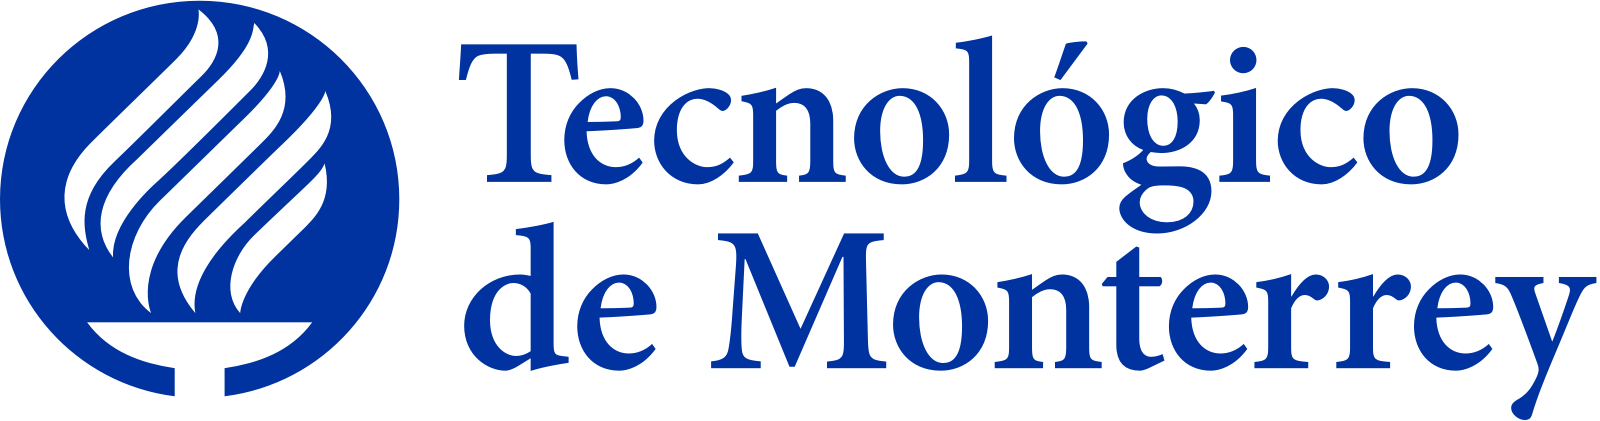

***Proyecto Integrador - Modelo predictivo de ingresos por venta de seguros***

Presentado a: Eduviges Ludivina Facundo Flores


***Equipo 4***


Andrea Vazquez Tadeo A01730613

Hector Manuel Gonzalez Villareal A00178679

Karina Zafra Vallejo A01793979



#Inicialización

In [5]:
#cargamos las librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [6]:
import warnings

#Suprimir todas las advertencias
warnings.filterwarnings("ignore")

#Restaurar el comportamiento de advertencias si es necesario más adelante
#warnings.filterwarnings("default")

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#url="/content/drive/MyDrive/Colab Notebooks/proyecto integrador/Base25.xlsx"
url="Base35.xlsx"
df = pd.read_excel(url, engine="openpyxl")
df.columns


Index(['id_encuesta', 'edad', 'genero', 'estadocivil', 'gradoestudios',
       'dependientes', 'clubsocial', 'numreuniones', 'estadooperacion',
       'actividadprincipal', 'cedula', 'anios', 'generaciones', 'trabajadocia',
       'trabajadoriesgos', 'usapromotorias', 'masde75', 'inicioporcurso',
       'tieneoficina', 'parejatrabaja', 'numempleados', 'ventaindividual',
       'familiarencia', 'capacitacionesxanio', 'outxautos', 'outypersonas',
       'outzempresa'],
      dtype='object')

#Descripción de las variables

1. id_encuesta: número único

2. edad: Edad del agente, rangos
* 1: 18-24
* 2: 25-29
* 3: 30-34
* 4: 35-39
* 5: 40-44
* 6: 45-59
* 7: 56+

3. genero: genero del agente
* 1: Masculino
* 2: Femenino

4. estadocivil
* 1: soltero
* 2: casado o viviendo con pareja
* 3: divorciado o separado
* 4: viudo

5. gradoestudios
* 1: básico: primaria o secundaria
* 2: preparatoria o técnica
* 3: profesional
* 4: posgrado

6. dependientes
* 0: Sin dependientes
* 1: 1 dependiente
* 2: 2 dependientes
* 3: más de 3 dependientes

7. clubsocial: es miembro de algún club social o religioso (variable binaria).

8. numreuniones: numero de reuniones sociales al mes
* 1: 0-1
* 2: 2-4
* 3: 5+

9. estadooperacion: estado de la república donde opera
* 1: Aguascalientes AS
* 2: Baja California BC
* 3: Baja California Sur BS
* 4: Campeche CC
* 5: Coahuila de Zaragoza CL
* 6: Colima CM
* 7: Chiapas CS
* 8: Chihuahua CH
* 9: Ciudad de México DF
* 10: Durango DG
* 11: Guanajuato GT
* 12: Guerrero GR
* 13: Hidalgo HG
* 14: Jalisco JC
* 15: México MC
* 16: Michoacán de Ocampo MN
* 17: Morelos MS
* 18: Nayarit NT
* 19: Nuevo León NL
* 20: Oaxaca OC
* 21: Puebla PL
* 22: Querétaro QT
* 23: Quintana Roo QR
* 24: San Luis Potosí SP
* 25: Sinaloa SL
* 26: Sonora SR
* 27: Tabasco TC
* 28: Tamaulipas TS
* 29: Tlaxcala TL
* 30: Veracruz VZ
* 31: Yucatán YN
* 32: Zacatecas ZS

10. actividadprincipal: vender seguros es su ingreso principal? (variable binaria)

11. cedula: cuenta con cédula de agente? (variable binaria)

12. anios: Años dedicándome a la venta de seguros
* 1: 1-3
* 2: 4-8
* 3: 9+

13. generaciones: generaciones de su familia en seguros
* 0: primera, yo soy el primero en mi familia
* 1: segunda, mis padres o abuelos iniciaron y de ahí tomé experiencia
* 2: tercera, desde mi abuelo nos dedicamos a seguros

14. trabajadocia: ¿Ha trabajado en alguna compañía de seguros?s (variable binaria)

15. trabajadoriesgos: ha trabajado en área de riesgos de alguna empresa? (variable binaria)

16. usapromotorias: ¿se apoya de una o varias promotorías? (variable binaria)

17. masde75: ¿He trabajado más del 75% de mi vida laboral en seguros? (variable binaria)

18. inicioporcurso: ¿inicie mi carrera en seguros en una capacitación masiva por parte de una compañía o producto específico? (variable binaria)

19. tieneoficina: ¿tengo una oficina aparte de mi domicilio? (variable binaria)

20. parejatrabaja: ¿Mi pareja trabaja conmigo? (variable binaria)

21. numempleados:
* 0: opero solo
* 1: 1-2
* 2: 3-6
* 3: 7-30
* 4: 30+

22. ventaindividual: ¿el 60% de mis ingresos son pólizas individuales? (variable binaria)

23. familiarencia: ¿Algún familiar directo trabaja de aseguradora? (variable binaria)

24. capacitacionesxanio: Número de capacitaciones a las que asisto al año
* 1: 0-3
* 2: 1-3
* 3: 3+

25. outxautos: Valor en venta en primas en autos y flotillas
* 1: 0 a $200,000
* 2: 200,000 a 1,000,000
* 3: 1,000,000 a 5,000,000
* 4: Mas de 5 millones

26. outypersonas: Valor de venta en primas en GMM, VIDA, personales
* 1: 0 a $500,000
* 2: 500,000 a 2,000,000
* 3: 2,000,000 a 10,000,000
* 4: Mas de 10 millones

27. outzempresa: Valor de venta en primas en seguros empresariales
* 1: 0 a $500,000
* 2: 500,000 a 2,000,000
* 3: 2,000,000 a 10,000,000
* 4: Mas de 10 millones

#Avance 1. Análisis exploratorio de datos

In [9]:
#vamos a ver el tamaño de la base de datos
df.shape

(35, 27)

In [10]:
#vamos a ver el tipo de datos que tenemos por columna
df.dtypes

id_encuesta            object
edad                    int64
genero                  int64
estadocivil             int64
gradoestudios           int64
dependientes            int64
clubsocial              int64
numreuniones            int64
estadooperacion         int64
actividadprincipal      int64
cedula                  int64
anios                   int64
generaciones            int64
trabajadocia            int64
trabajadoriesgos        int64
usapromotorias          int64
masde75                 int64
inicioporcurso          int64
tieneoficina            int64
parejatrabaja           int64
numempleados            int64
ventaindividual         int64
familiarencia           int64
capacitacionesxanio     int64
outxautos               int64
outypersonas            int64
outzempresa             int64
dtype: object

In [11]:
#revisamos que no tengamos datos nulos
df.isnull().sum()

id_encuesta            0
edad                   0
genero                 0
estadocivil            0
gradoestudios          0
dependientes           0
clubsocial             0
numreuniones           0
estadooperacion        0
actividadprincipal     0
cedula                 0
anios                  0
generaciones           0
trabajadocia           0
trabajadoriesgos       0
usapromotorias         0
masde75                0
inicioporcurso         0
tieneoficina           0
parejatrabaja          0
numempleados           0
ventaindividual        0
familiarencia          0
capacitacionesxanio    0
outxautos              0
outypersonas           0
outzempresa            0
dtype: int64

In [12]:
#Revisamos las estadísticas resumidas del conjunto de datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,35.0,5.028571,1.524037,1.0,4.0,5.0,6.0,7.0
genero,35.0,1.314286,0.471008,1.0,1.0,1.0,2.0,2.0
estadocivil,35.0,1.942857,0.416064,1.0,2.0,2.0,2.0,3.0
gradoestudios,35.0,3.171429,0.382385,3.0,3.0,3.0,3.0,4.0
dependientes,35.0,1.657143,1.186762,0.0,1.0,2.0,3.0,3.0
clubsocial,35.0,0.485714,0.507093,0.0,0.0,0.0,1.0,1.0
numreuniones,35.0,1.657143,0.591253,1.0,1.0,2.0,2.0,3.0
estadooperacion,35.0,20.200000,4.770004,5.0,19.0,19.0,19.0,31.0
actividadprincipal,35.0,0.628571,0.490241,0.0,0.0,1.0,1.0,1.0
cedula,35.0,0.657143,0.481594,0.0,0.0,1.0,1.0,1.0


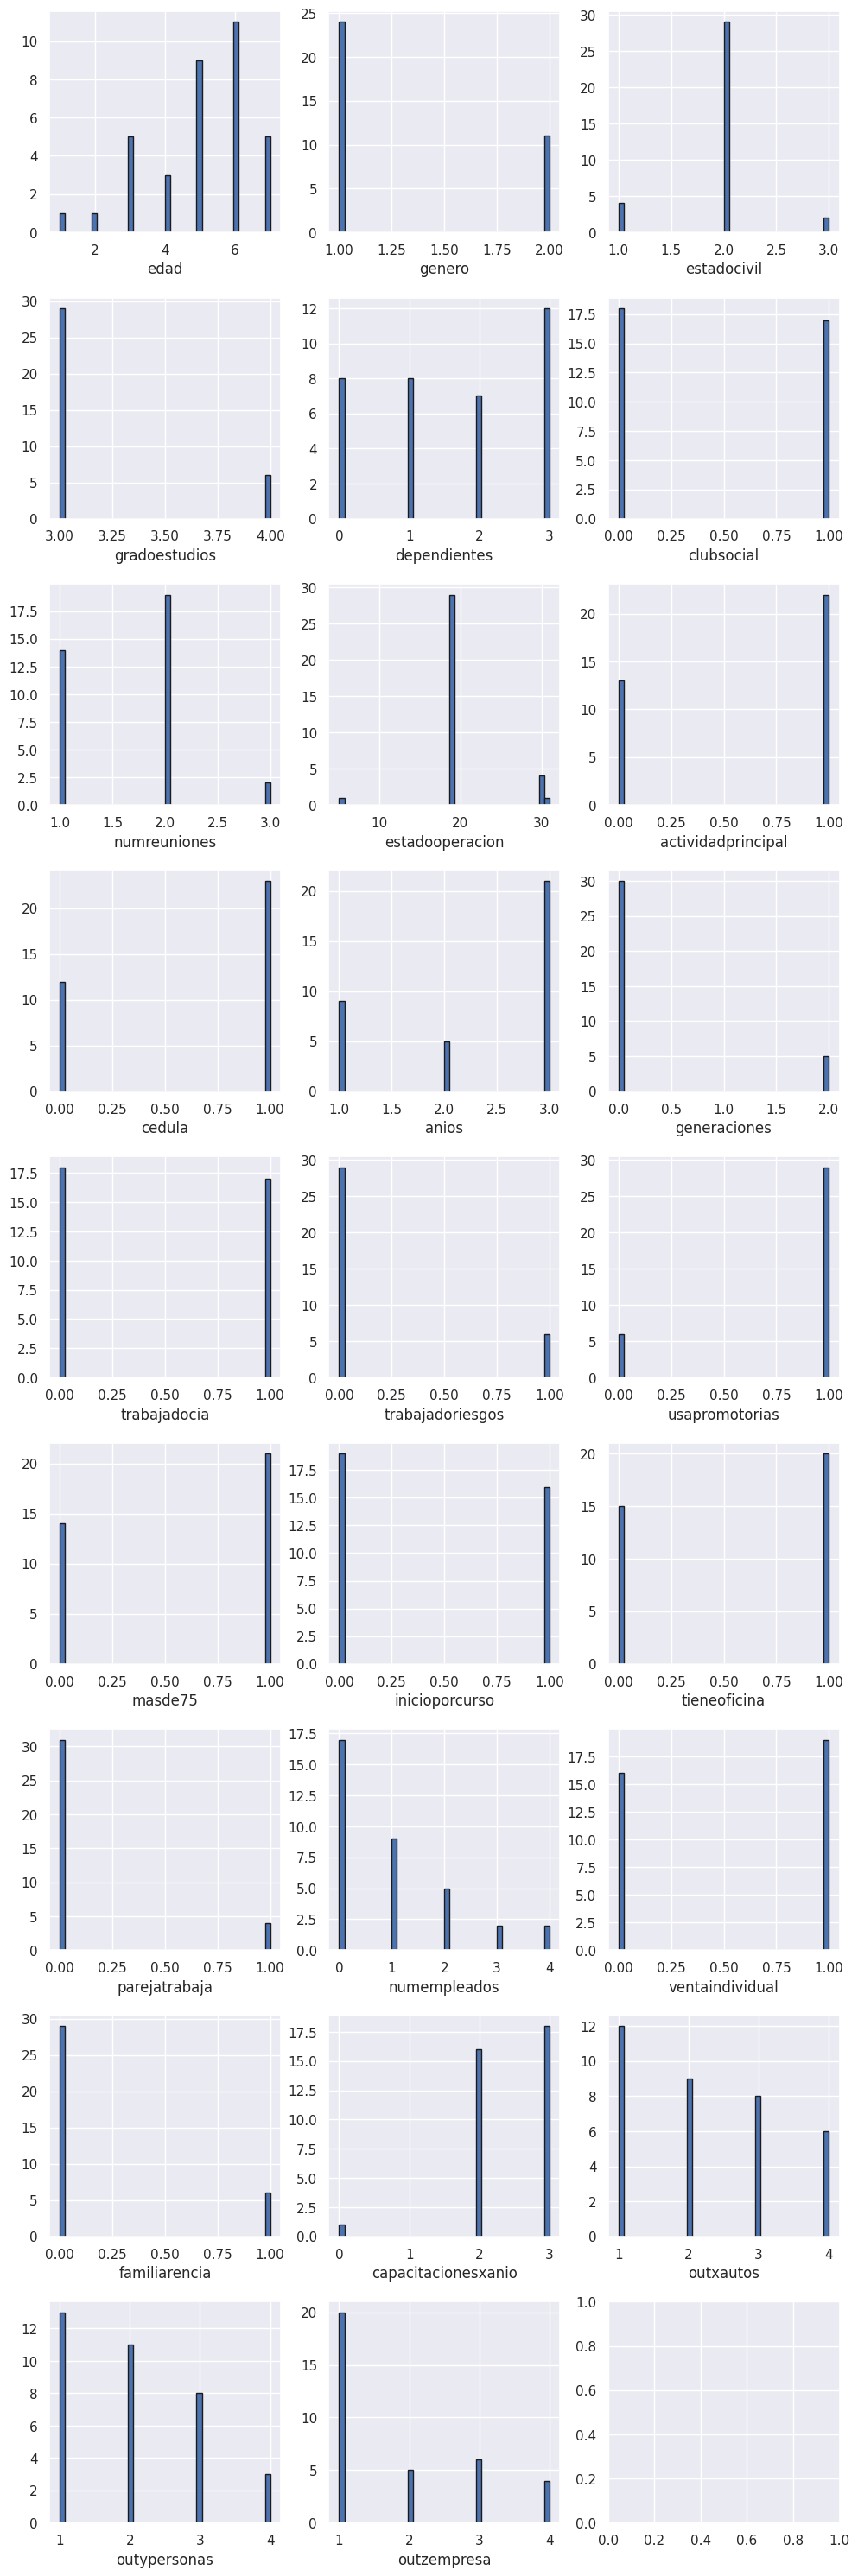

In [13]:
#eliminamos la única columna que no es numérica
df_num = df.drop(columns=["id_encuesta"])

#generamos los histogramas para evaluar la distribución de las variables
sns.set(rc={'figure.figsize':(10,30)})
fig, axes = plt.subplots(9, 3)

for i, col in enumerate(df_num):
  plt.subplot(9,3,i+1)
  plt.hist(df_num[col].dropna(), bins=40, edgecolor='k')
  plt.xlabel(col)

plt.tight_layout()
plt.show()

Confirmamos que no hay valores atípicos en el conjunto de datos, debido a que se han realizado ajustes desde la captura de la información para evitar este problema. Se ha realizado de forma que ya tengamos los datos como si hubieramos aplicado una Codificación de etiquetas (label encoding)

Adicionalmente, no se observan distribuciones sesgadas en el conjunto de datos, por lo que no necesitamos aplicar alguna transformaciones.

##Dataframe 1: Seguros de autos

In [14]:
#vamos a dividir el dataFrame en 3, para evaluar de forma independiente cada uno de las salidas.
df_auto=df_num.drop(columns=["outypersonas","outzempresa"])
df_auto.columns

Index(['edad', 'genero', 'estadocivil', 'gradoestudios', 'dependientes',
       'clubsocial', 'numreuniones', 'estadooperacion', 'actividadprincipal',
       'cedula', 'anios', 'generaciones', 'trabajadocia', 'trabajadoriesgos',
       'usapromotorias', 'masde75', 'inicioporcurso', 'tieneoficina',
       'parejatrabaja', 'numempleados', 'ventaindividual', 'familiarencia',
       'capacitacionesxanio', 'outxautos'],
      dtype='object')

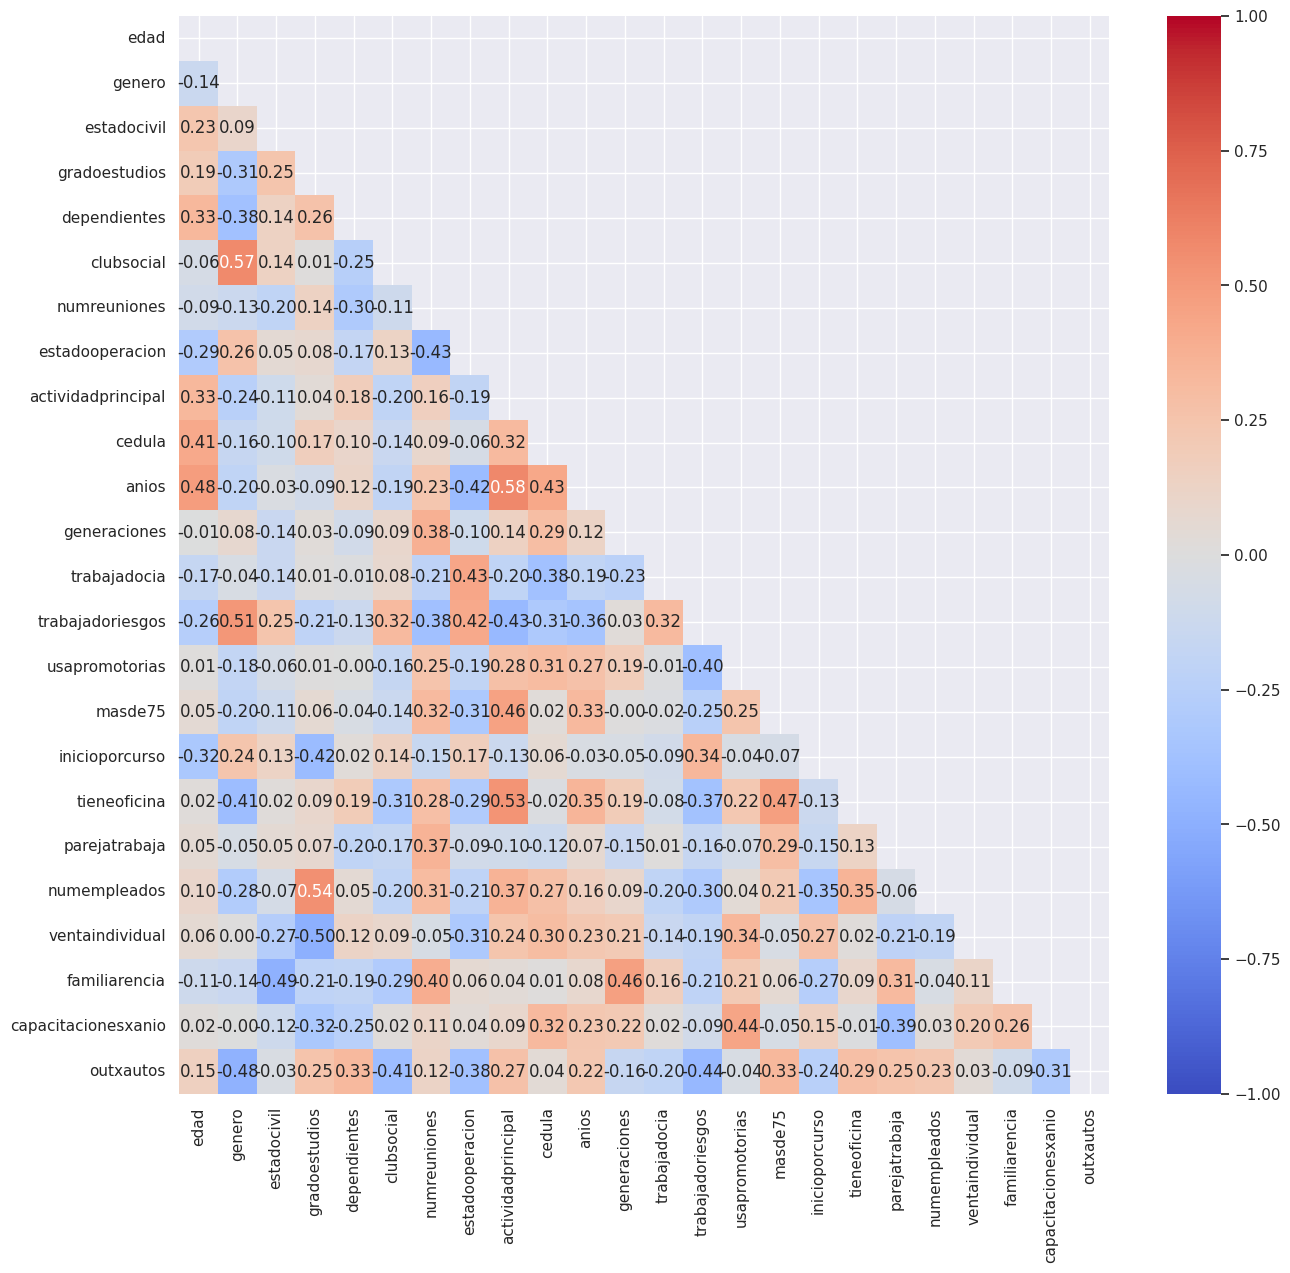

In [15]:
# Calcular la matriz de correlación
corr_matrix = df_auto.corr(method='pearson')

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Dibujar el heatmap con la máscara
sns.set(rc={'figure.figsize':(15,14)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.show()

In [16]:
#Nombre de la variable objetivo
target_variable = 'outxautos'

#Extraer la fila correspondiente a la la variable objetivo
corr_with_target = corr_matrix[target_variable].drop(labels=[target_variable])  # Excluir la autocorrelación

#Ordenar las correlaciones en orden descendente
sorted_corr_with_target = corr_with_target.abs().sort_values(ascending=False)

#Seleccionar las 5 variables con mayor correlación con la variable objetivo
top_5_corr_with_target = sorted_corr_with_target.head(5)

print(top_5_corr_with_target)

genero              0.477388
trabajadoriesgos    0.440035
clubsocial          0.410682
estadooperacion     0.379802
masde75             0.329415
Name: outxautos, dtype: float64


##Dataframe 2: Seguro de personas

In [17]:
#vamos a dividir el dataFrame en 3, para evaluar de forma independiente cada uno de las salidas.
df_pers=df_num.drop(columns=["outxautos","outzempresa"])
df_pers.columns

Index(['edad', 'genero', 'estadocivil', 'gradoestudios', 'dependientes',
       'clubsocial', 'numreuniones', 'estadooperacion', 'actividadprincipal',
       'cedula', 'anios', 'generaciones', 'trabajadocia', 'trabajadoriesgos',
       'usapromotorias', 'masde75', 'inicioporcurso', 'tieneoficina',
       'parejatrabaja', 'numempleados', 'ventaindividual', 'familiarencia',
       'capacitacionesxanio', 'outypersonas'],
      dtype='object')

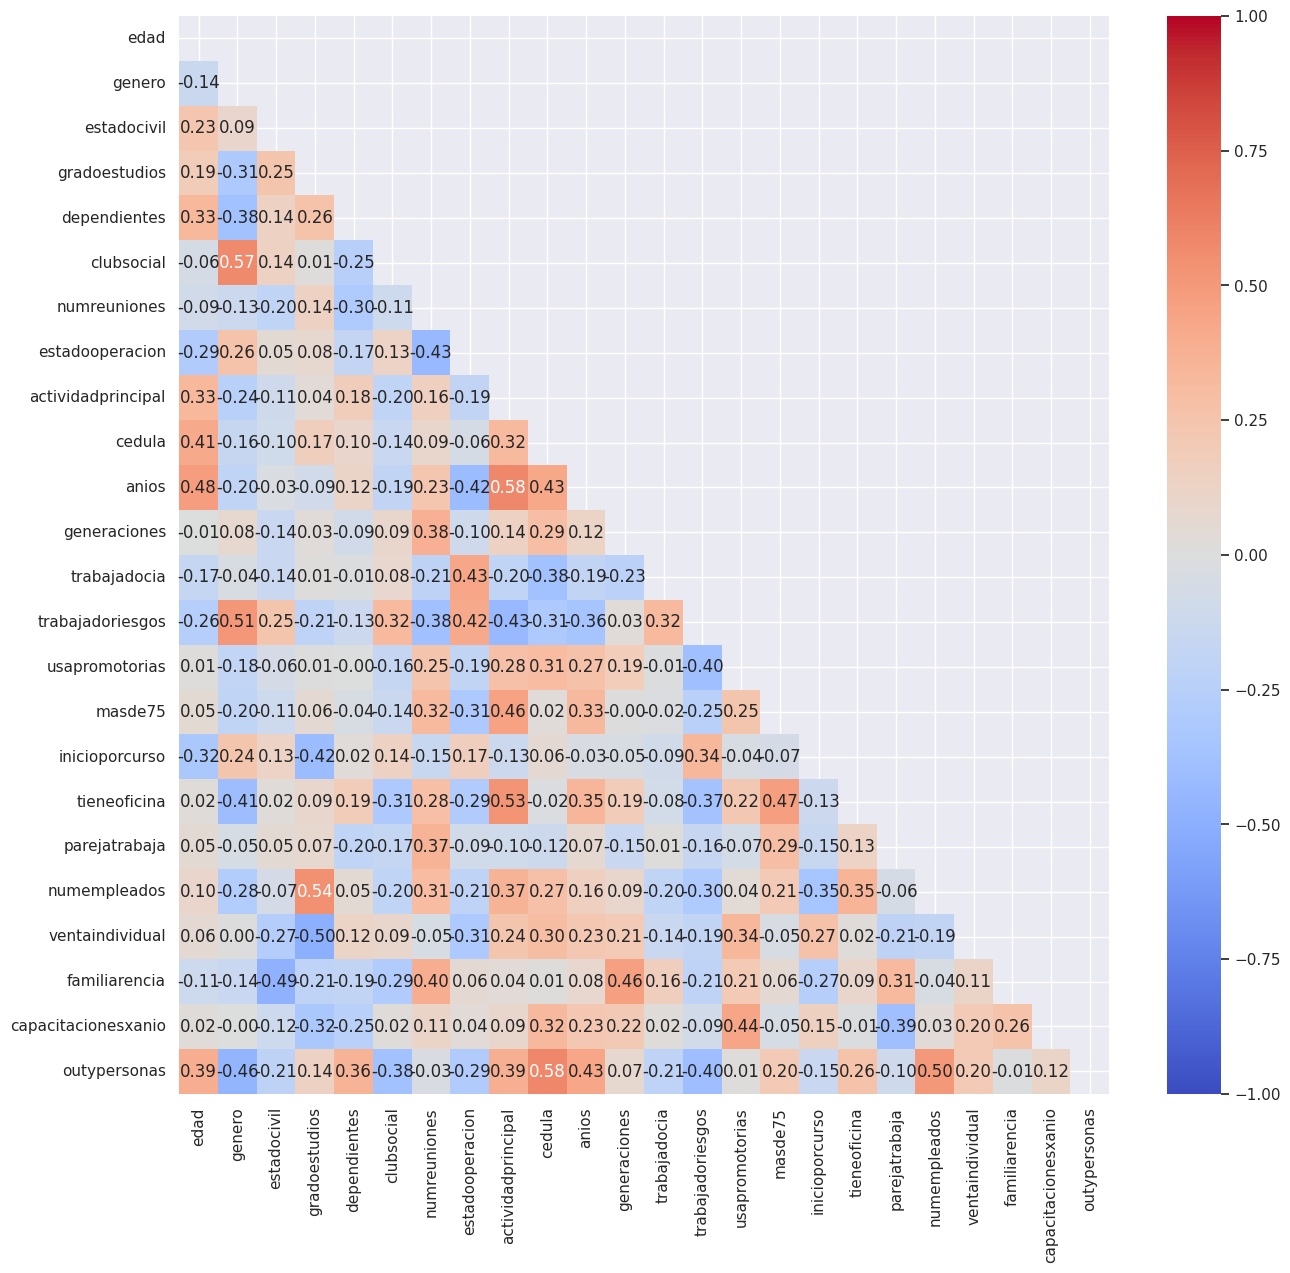

In [18]:
# Calcular la matriz de correlación
corr_matrix = df_pers.corr(method='pearson')

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Dibujar el heatmap con la máscara
sns.set(rc={'figure.figsize':(15,14)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.show()

In [19]:
# Nombre de la variable objetivo
target_variable = 'outypersonas'

# Extraer la fila correspondiente a la la variable objetivo
corr_with_target = corr_matrix[target_variable].drop(labels=[target_variable])  # Excluir la autocorrelación

# Ordenar las correlaciones en orden descendente
sorted_corr_with_target = corr_with_target.abs().sort_values(ascending=False)

# Seleccionar las 5 variables con mayor correlación con la variable objetivo
top_5_corr_with_target = sorted_corr_with_target.head(5)

print(top_5_corr_with_target)

cedula              0.579416
numempleados        0.504774
genero              0.463805
anios               0.433248
trabajadoriesgos    0.403925
Name: outypersonas, dtype: float64


##Dataframe 3: Seguro de empresa

In [20]:
#vamos a dividir el dataFrame en 3, para evaluar de forma independiente cada uno de las salidas.
df_emp=df_num.drop(columns=["outxautos","outypersonas"])
df_emp.columns

Index(['edad', 'genero', 'estadocivil', 'gradoestudios', 'dependientes',
       'clubsocial', 'numreuniones', 'estadooperacion', 'actividadprincipal',
       'cedula', 'anios', 'generaciones', 'trabajadocia', 'trabajadoriesgos',
       'usapromotorias', 'masde75', 'inicioporcurso', 'tieneoficina',
       'parejatrabaja', 'numempleados', 'ventaindividual', 'familiarencia',
       'capacitacionesxanio', 'outzempresa'],
      dtype='object')

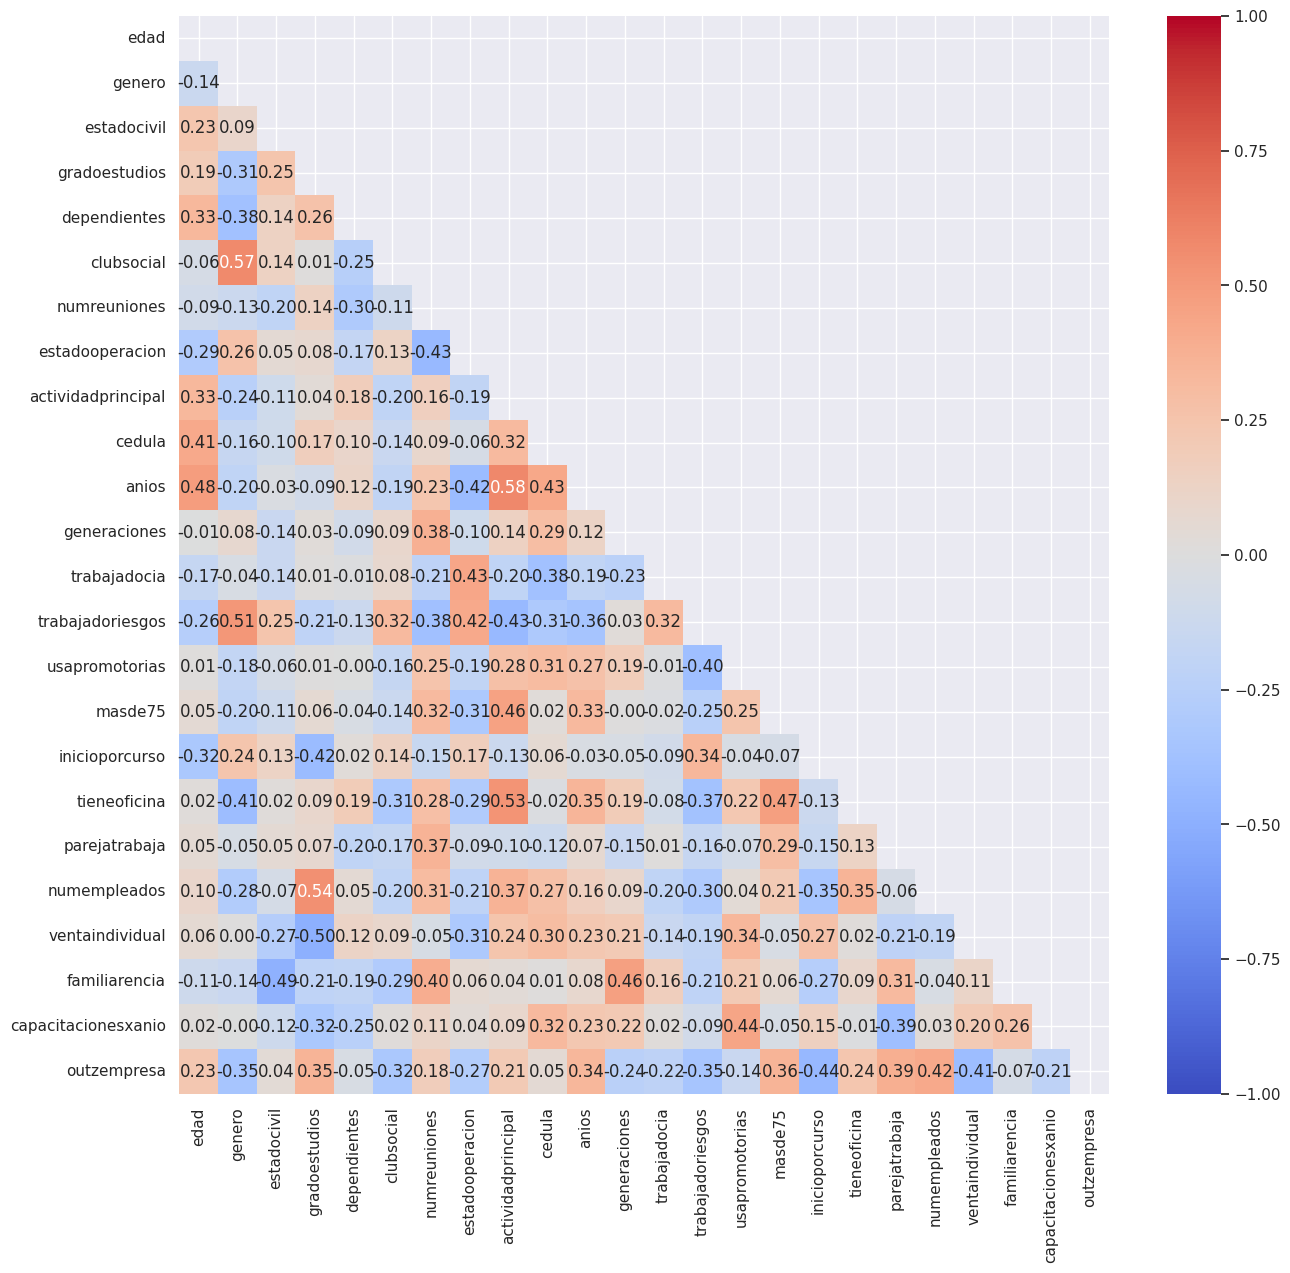

In [21]:
# Calcular la matriz de correlación
corr_matrix = df_emp.corr(method='pearson')

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Dibujar el heatmap con la máscara
sns.set(rc={'figure.figsize':(15,14)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.show()

In [22]:
# Nombre de la variable objetivo
target_variable = 'outzempresa'

# Extraer la fila correspondiente a la la variable objetivo
corr_with_target = corr_matrix[target_variable].drop(labels=[target_variable])  # Excluir la autocorrelación

# Ordenar las correlaciones en orden descendente
sorted_corr_with_target = corr_with_target.abs().sort_values(ascending=False)

# Seleccionar las 5 variables con mayor correlación con la variable objetivo
top_5_corr_with_target = sorted_corr_with_target.head(5)

print(top_5_corr_with_target)

inicioporcurso     0.437710
numempleados       0.421213
ventaindividual    0.410448
parejatrabaja      0.388918
masde75            0.355765
Name: outzempresa, dtype: float64


##Conclusión del EDA

Podemos observar que cada salida tiene sus propias variables más correlacionadas.

* outxautos: parejatrabaja, estadooperacion, trabajadocia, trabajadoriesgos, anios
* outypersonas: cedula, anios, ventaindividual, actividadprincipal, dependientes
* outzempresa: parejatrabaja, numreuniones, anios, inicioporcurso, masde75

Adicionalmente, encontramos que los años y si la pareja trabaja en el medio, son variables determinantes en el éxito de la venta de seguros independientemente del tipo.





#Avance 2. Ingeniería de características

##Funciones generales para todos los dataframe

In [23]:
def evaluate_model(model, X_train_intra, X_test_intra, y_train_intra, y_test_intra):

  # Entrenar el modelo baseline
  model.fit(X_train_intra, y_train_intra)

  # Realizar predicciones con el modelo baseline
  baseline_predictions = model.predict(X_test_intra)

  # Calcular la precisión del modelo baseline
  accuracy_baseline = accuracy_score(y_test_intra, baseline_predictions)

  # Mostrar métricas del modelo baseline
  print(f'Precisión del modelo: {accuracy_baseline:.2f}')
  print(classification_report(y_test_intra, baseline_predictions))

In [24]:
def ROC_model(model, X_train_intra, X_test_intra, y_train_intra, y_test_intra):

  classifier = model
  # Obtener las probabilidades predichas por el Dummy Classifier
  y_prob_dummy = classifier.predict_proba(X_test_intra)

  # Calcular la curva ROC para cada clase
  fpr = {}
  tpr = {}
  roc_auc = {}
  for i in range(classifier.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_intra == i, y_prob_dummy[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot de la curva ROC para cada clase
  plt.figure(figsize=(6, 4))
  for i in range(classifier.n_classes_):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curvas ROC - Dummy Classifier (One-vs-Rest)')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()

In [25]:
def plot_pca_variance_explained(X_train_intra, X_test_intra):
  global n_components_95

  # Crear una instancia de PCA y ajustar los datos escalados
  pca = PCA()
  pca.fit_transform(X_train_intra)

  # Obtener la varianza explicada por cada componente principal
  explained_variance_ratio = pca.explained_variance_ratio_

  # Graficar la varianza explicada acumulada y el gráfico de barras
  plt.figure(figsize=(8, 6))

  # Graficar la varianza explicada acumulada
  plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')

  # Graficar el gráfico de barras de varianza explicada por cada componente principal
  plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza Explicada por Componente Principal')

  plt.xlabel('Número de Componentes Principales')
  plt.ylabel('Varianza Explicada Acumulada')
  plt.title('Varianza Explicada por Componentes Principales')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Obtener la varianza explicada acumulada
  explained_variance_cumulative = np.cumsum(explained_variance_ratio)

  # Encontrar el número mínimo de componentes para explicar al menos el 95% de la varianza
  n_components_95 = np.argmax(explained_variance_cumulative >= 0.95) + 1  # Sumamos 1 porque los índices empiezan en 0

  print(f"Número de componentes para explicar el 95% de la varianza: {n_components_95}")


##Dataframe 1: Seguros de autos

Separamos el dataset en **entrenamiento** y **prueba** dataframes para asi poder entrenar nuestro modelo (al tomar valores del conjunto de entrenamiento) y probarlo (comparando las predicciones del modelo con los valores del conjunto de prueba), utilizando **70%** para el entrenamiento y **30%** para prueba

In [26]:
# Separar las características (X) y la variable objetivo (y)
X1 = df_auto.drop(columns=['outxautos'])
y1 = df_auto['outxautos']

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f'Tamaño de X_train: {X_train1.shape}')
print(f'Tamaño de X_test: {X_test1.shape}')
print(f'Tamaño de y_train: {y_train1.shape}')
print(f'Tamaño de y_test: {y_test1.shape}')

Tamaño de X_train: (24, 23)
Tamaño de X_test: (11, 23)
Tamaño de y_train: (24,)
Tamaño de y_test: (11,)


###Modelo baseline

Obtenemos el error del modelo baseline que utiliza el promedio de la variable objetivo en el dataframe de entrenamiento.
De manera general lo que realiza este modelo es calcular el promedio de todos los valores de la variable objetivo dentro del dataframe de entrenamiento, lo cual nos servira para evaluar los modelos adicionales basados en el promedio del error absoluto.

In [27]:
# Crear un modelo baseline de clasificación que predice la clase más frecuente
dummy_classifier = DummyClassifier(strategy='most_frequent')

evaluate_model(dummy_classifier, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.45
              precision    recall  f1-score   support

           1       0.45      1.00      0.62         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.11      0.25      0.16        11
weighted avg       0.21      0.45      0.28        11



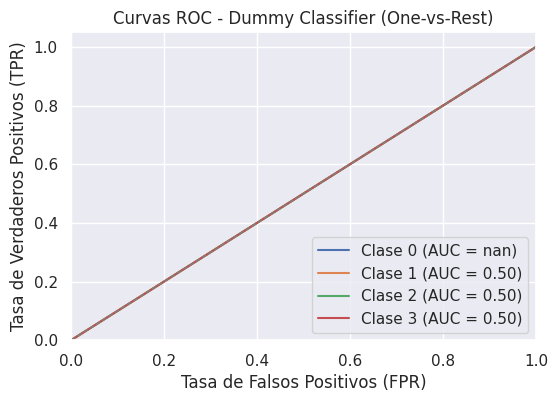

In [28]:
ROC_model(dummy_classifier, X_train1, X_test1, y_train1, y_test1)

###Random Forest

In [29]:
# Crear una instancia del modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.36        11
   macro avg       0.31      0.40      0.33        11
weighted avg       0.39      0.36      0.36        11



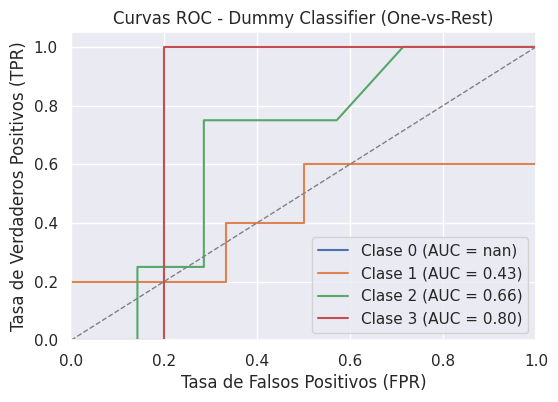

In [30]:
ROC_model(rf_classifier, X_train1, X_test1, y_train1, y_test1)

###PCA

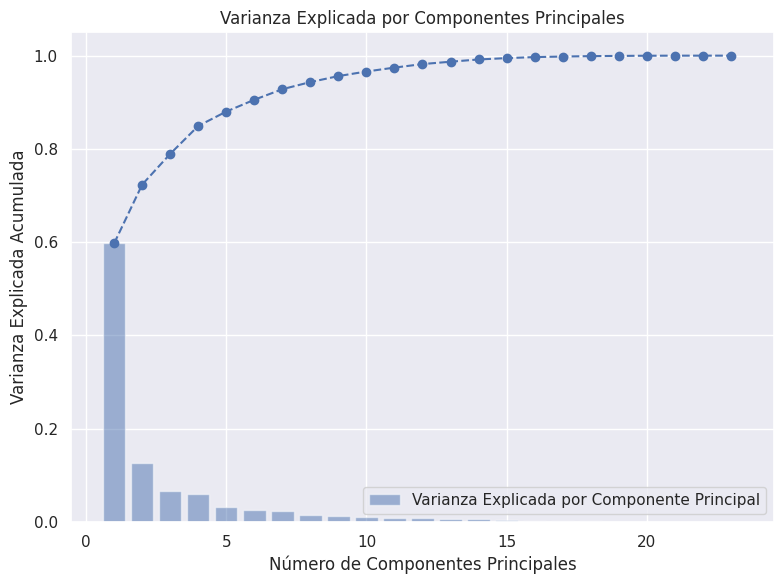

Número de componentes para explicar el 95% de la varianza: 9


In [31]:
plot_pca_variance_explained(X_train1, X_test1)

###Random forest con PCA

In [32]:
# Aplicar PCA
pca1 = PCA(n_components=n_components_95)  # Mantener componentes que expliquen el 99% de la varianza
X_train_pca1 = pca1.fit_transform(X_train1)
X_test_pca1 = pca1.transform(X_test1)

# Crear y entrenar el modelo de Random Forest Classifier
rf_classifier_pca = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier_pca, X_train_pca1, X_test_pca1, y_train1, y_test1)

Precisión del modelo: 0.45
              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.45        11
   macro avg       0.56      0.46      0.43        11
weighted avg       0.75      0.45      0.51        11



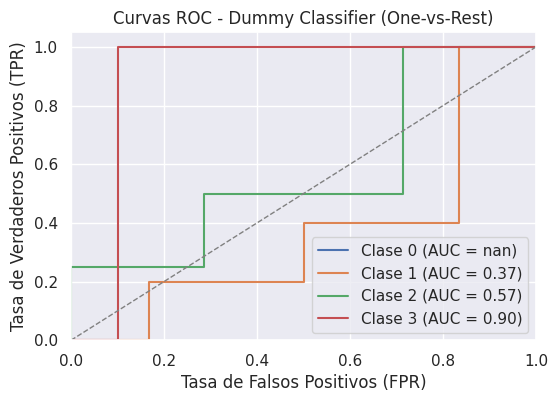

In [33]:
ROC_model(rf_classifier_pca, X_train_pca1, X_test_pca1, y_train1, y_test1)

##Dataframe 2: Seguros de personas

In [34]:
# Separar las características (X) y la variable objetivo (y)
X2 = df_pers.drop(columns=['outypersonas'])
y2 = df_pers['outypersonas']

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f'Tamaño de X_train: {X_train2.shape}')
print(f'Tamaño de X_test: {X_test2.shape}')
print(f'Tamaño de y_train: {y_train2.shape}')
print(f'Tamaño de y_test: {y_test2.shape}')

Tamaño de X_train: (24, 23)
Tamaño de X_test: (11, 23)
Tamaño de y_train: (24,)
Tamaño de y_test: (11,)


###Modelo baseline

In [35]:
# Crear un modelo baseline de clasificación que predice la clase más frecuente
dummy_classifier2 = DummyClassifier(strategy='most_frequent')

evaluate_model(dummy_classifier2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.27
              precision    recall  f1-score   support

           1       0.27      1.00      0.43         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.27        11
   macro avg       0.07      0.25      0.11        11
weighted avg       0.07      0.27      0.12        11



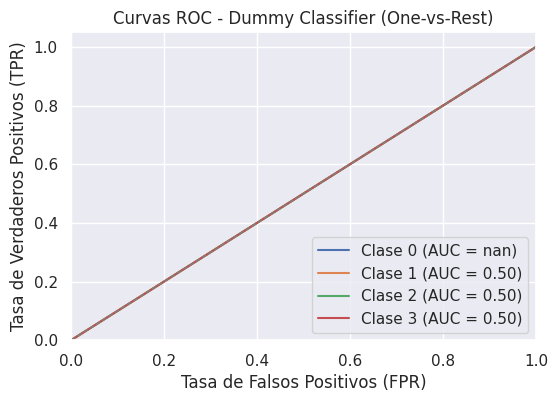

In [36]:
ROC_model(dummy_classifier2, X_train2, X_test2, y_train2, y_test2)

###Random Forest

In [37]:
# Crear una instancia del modelo Random Forest Classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         4
           3       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.23      0.42      0.29        11
weighted avg       0.21      0.36      0.26        11



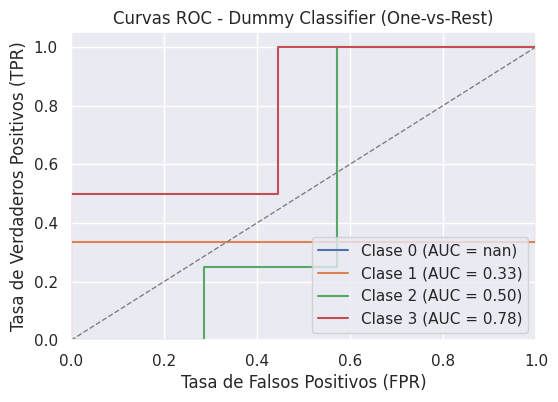

In [38]:
ROC_model(rf_classifier2, X_train2, X_test2, y_train2, y_test2)

###PCA

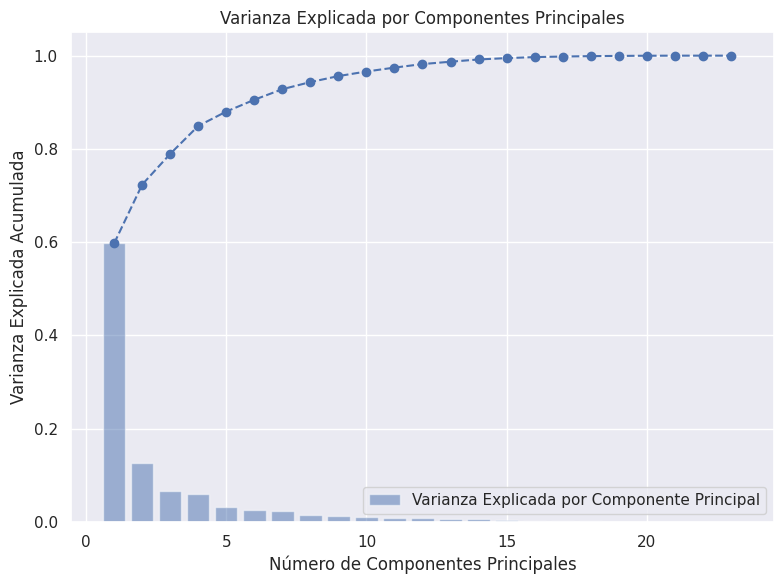

Número de componentes para explicar el 95% de la varianza: 9


In [39]:
plot_pca_variance_explained(X_train2, X_test2)

###Random forest con PCA

In [40]:
# Aplicar PCA
pca2 = PCA(n_components=n_components_95)  # Mantener componentes que expliquen el 99% de la varianza
X_train_pca2 = pca2.fit_transform(X_train2)
X_test_pca2 = pca2.transform(X_test2)

# Crear y entrenar el modelo de Random Forest Classifier
rf_classifier_pca2 = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier_pca2, X_train_pca2, X_test_pca2, y_train2, y_test2)

Precisión del modelo: 0.45
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.40      0.50      0.44         4
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         2

    accuracy                           0.45        11
   macro avg       0.35      0.42      0.38        11
weighted avg       0.37      0.45      0.41        11



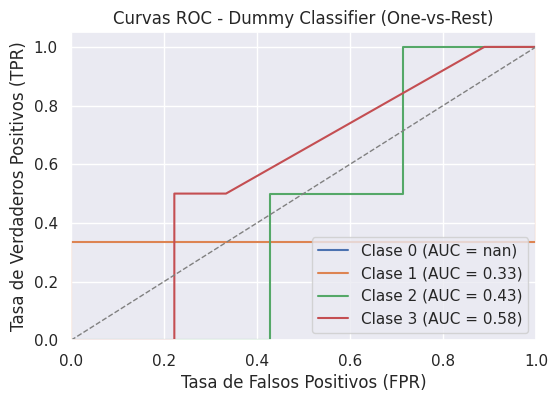

In [41]:
ROC_model(rf_classifier_pca2, X_train_pca2, X_test_pca2, y_train2, y_test2)

##Dataframe 3: Seguros de empresas

In [42]:
# Separar las características (X) y la variable objetivo (y)
X3 = df_emp.drop(columns=['outzempresa'])
y3 = df_emp['outzempresa']

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f'Tamaño de X_train: {X_train3.shape}')
print(f'Tamaño de X_test: {X_test3.shape}')
print(f'Tamaño de y_train: {y_train3.shape}')
print(f'Tamaño de y_test: {y_test3.shape}')

Tamaño de X_train: (24, 23)
Tamaño de X_test: (11, 23)
Tamaño de y_train: (24,)
Tamaño de y_test: (11,)


###Modelo baseline

In [43]:
# Crear un modelo baseline de clasificación que predice la clase más frecuente
dummy_classifier3 = DummyClassifier(strategy='most_frequent')

evaluate_model(dummy_classifier3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



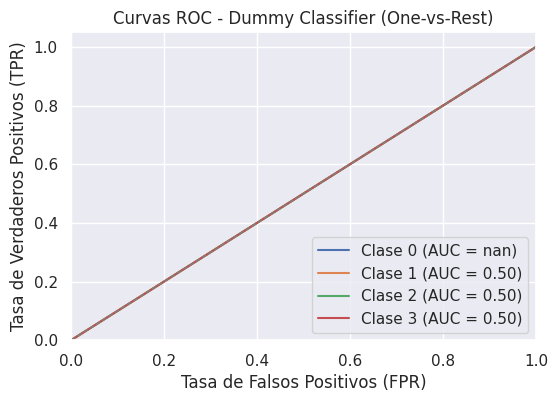

In [44]:
ROC_model(dummy_classifier3, X_train3, X_test3, y_train3, y_test3)

###Random Forest

In [45]:
# Crear una instancia del modelo Random Forest Classifier
rf_classifier3 = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



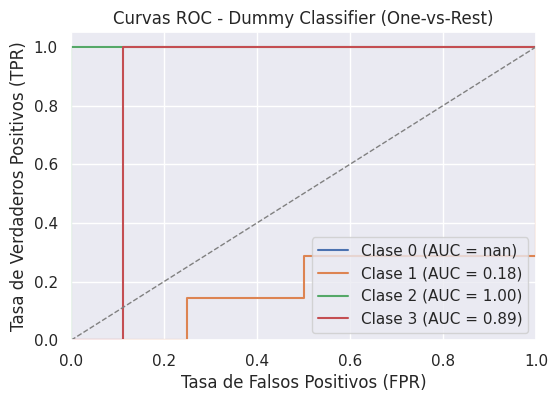

In [46]:
ROC_model(rf_classifier3, X_train3, X_test3, y_train3, y_test3)

###PCA

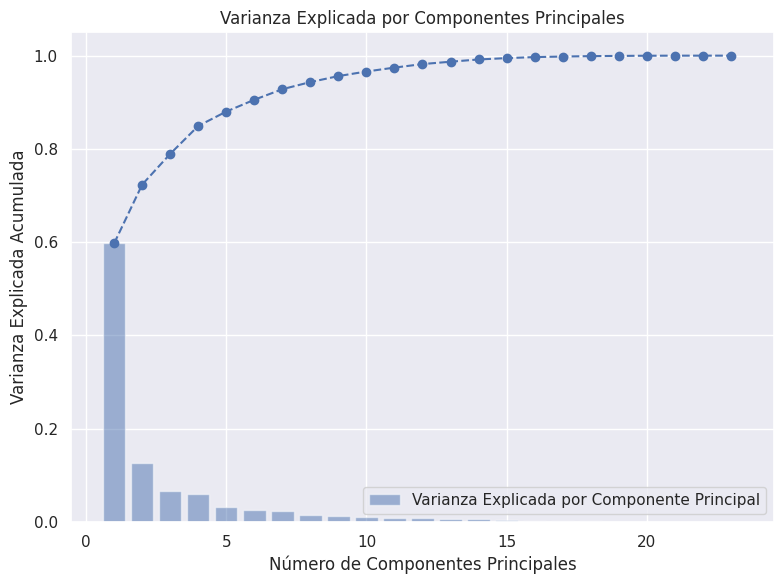

Número de componentes para explicar el 95% de la varianza: 9


In [47]:
plot_pca_variance_explained(X_train3, X_test3)

###Random forest con PCA

In [48]:
# Aplicar PCA
pca3 = PCA(n_components=n_components_95)  # Mantener componentes que expliquen el 99% de la varianza
X_train_pca3 = pca3.fit_transform(X_train3)
X_test_pca3 = pca3.transform(X_test3)

# Crear y entrenar el modelo de Random Forest Classifier
rf_classifier_pca3 = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier_pca3, X_train_pca3, X_test_pca3, y_train3, y_test3)

Precisión del modelo: 0.73
              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         1

    accuracy                           0.73        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.54      0.73      0.62        11



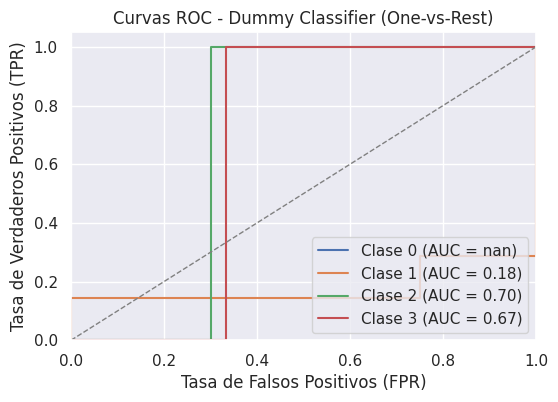

In [49]:
ROC_model(rf_classifier_pca3, X_train_pca3, X_test_pca3, y_train3, y_test3)

#Avance 3. Baseline

* **¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?**

Debido a que la variable de salida, es de clasificación, es decir, debemos determinar en que rango está, entonces decidimos generar un clasificador dummy para la baseline.

* **¿Se puede determinar la importancia de las características para el modelo generado?** Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.

R// Revisando los componentes mediante PCA se determina que se necesitan 7 variables para el caso de la variable de salida outxautos. sin embargo, al correr el modelo con estas 7 componentes no se mejora la precisión del modelo.

* **¿El modelo está sub/sobreajustando los datos de entrenamiento?**

R// El modelo está subajustado, ya que no contamos con la cantidad suficiente de datos para entrenamiento.

* **¿Cuál es la métrica adecuada para este problema de negocio?**

R// Nos estamos guiando por las métricas en problemas de clasificación ya que tendremos 3 variables de salida: outxautos, outypersonas, outzempresas y cada una de esa a su vez tiene 4 categorías.

* **¿Cuál debería ser el desempeño mínimo a obtener?**

R//

#Avance 4. Modelos alternativos

##Construcción de Modelos para Dataframe 1: Seguros de autos

###Naive Bayes

In [50]:
# Crear una instancia del modelo Naive Bayes categórico
nb_model = CategoricalNB()

evaluate_model(nb_model, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.27
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.27        11
   macro avg       0.29      0.35      0.29        11
weighted avg       0.35      0.27      0.29        11



###DecisionTreeClassifier

In [51]:
# Crear una instancia del clasificador de árbol de decisión
DTC = DecisionTreeClassifier(random_state=42)

evaluate_model(DTC, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.50      0.40      0.44         5
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1

    accuracy                           0.36        11
   macro avg       0.31      0.41      0.29        11
weighted avg       0.43      0.36      0.36        11



###GradientBoostingClassifier

In [52]:
# Crear una instancia del modelo Gradient Boosting
GBC = GradientBoostingClassifier(random_state=42)

evaluate_model(GBC, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1

    accuracy                           0.36        11
   macro avg       0.25      0.40      0.27        11
weighted avg       0.36      0.36      0.34        11



###Redes Neuronales

In [53]:
# Crear una instancia del modelo MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

evaluate_model(MLP, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         4
           3       0.20      1.00      0.33         1
           4       0.33      1.00      0.50         1

    accuracy                           0.36        11
   macro avg       0.30      0.60      0.33        11
weighted avg       0.35      0.36      0.30        11



###Linear Regression

In [54]:
# Crear una instancia del modelo Linear Regression
lr1 = LinearRegression().fit(X_train1, y_train1)
lr1_test_predictions = lr1.predict(X_test1)


In [55]:
xgb1 = XGBRegressor(random_state = 2021).fit(X_train1, y_train1)
xgb1_test_predictions = xgb1.predict(X_test1)
mean_absolute_error(y_test1, xgb1_test_predictions)
mean_squared_error(y_test1, xgb1_test_predictions)

1.5140718019558383

###Random Forest

In [56]:
# Crear una instancia del modelo Random Forest Classifier
Rf1 = RandomForestClassifier(random_state=42)

evaluate_model(Rf1, X_train1, X_test1, y_train1, y_test1)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.36        11
   macro avg       0.31      0.40      0.33        11
weighted avg       0.39      0.36      0.36        11



###Comparación de modelos

Se tiene la siguiente comparativa de modelos para el Dataframe 1 correspondiente a la variable de salida outxautos



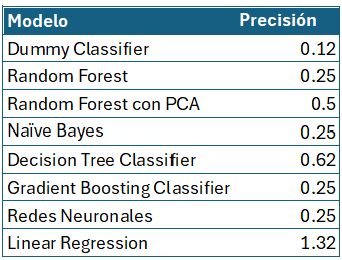

##Construcción de Modelos para Dataframe 2: Seguros de personas

###Naive Bayes

In [57]:
# Crear una instancia del modelo Naive Bayes categórico
nb_model2 = CategoricalNB()

evaluate_model(nb_model2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         4
           3       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.23      0.42      0.29        11
weighted avg       0.21      0.36      0.26        11



###DecisionTreeClassifier

In [58]:
# Crear una instancia del clasificador de árbol de decisión
DTC2 = DecisionTreeClassifier(random_state=42)

evaluate_model(DTC2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.73
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.60      0.75      0.67         4
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.82      0.73      0.73        11
weighted avg       0.79      0.73      0.73        11



###GradientBoostingClassifier

In [59]:
# Crear una instancia del modelo Gradient Boosting
GBC2 = GradientBoostingClassifier(random_state=42)

evaluate_model(GBC2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         4
           3       0.29      1.00      0.44         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.32      0.42      0.31        11
weighted avg       0.32      0.36      0.30        11



###Redes Neuronales

In [60]:
# Crear una instancia del modelo MLPClassifier
MLP2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

evaluate_model(MLP2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.45
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.40      0.50      0.44         4
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         2

    accuracy                           0.45        11
   macro avg       0.35      0.42      0.38        11
weighted avg       0.39      0.45      0.42        11



### Linear Regression

In [61]:
# Crear una instancia del modelo Linear Regression
lr2 = LinearRegression().fit(X_train2, y_train2)
lr2_test_predictions = lr2.predict(X_test2)
mean_absolute_error(y_test2, lr2_test_predictions)

5.914910781168925

###Random Forest

In [62]:
# Crear una instancia del modelo Random Forest Classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

evaluate_model(rf_classifier2, X_train2, X_test2, y_train2, y_test2)

Precisión del modelo: 0.36
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         4
           3       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.23      0.42      0.29        11
weighted avg       0.21      0.36      0.26        11



###Comparación de modelos

Se tiene la siguiente comparativa de modelos para el Dataframe 1 correspondiente a la variable de salida outxautos



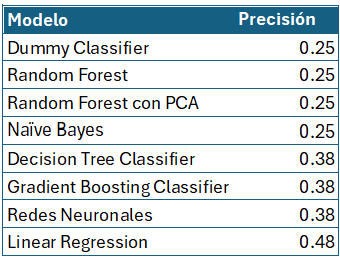

##Construcción de Modelos para Dataframe 3: Seguros de empresas

###Naive Bayes

In [63]:
# Crear una instancia del modelo Naive Bayes categórico
nb_model3 = CategoricalNB()

evaluate_model(nb_model3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



###DecisionTreeClassifier

In [64]:
# Crear una instancia del clasificador de árbol de decisión
DTC3 = DecisionTreeClassifier(random_state=42)

evaluate_model(DTC3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.64
              precision    recall  f1-score   support

           1       0.75      0.86      0.80         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1

    accuracy                           0.64        11
   macro avg       0.44      0.46      0.45        11
weighted avg       0.57      0.64      0.60        11



###GradientBoostingClassifier

In [65]:
# Crear una instancia del modelo Gradient Boosting
GBC3 = GradientBoostingClassifier(random_state=42)

evaluate_model(GBC3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.45
              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.18      0.18      0.18        11
weighted avg       0.45      0.45      0.45        11



###Redes Neuronales

In [66]:
# Crear una instancia del modelo MLPClassifier
MLP3 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

evaluate_model(MLP3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.55
              precision    recall  f1-score   support

           1       0.75      0.86      0.80         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.55        11
   macro avg       0.19      0.21      0.20        11
weighted avg       0.48      0.55      0.51        11



###Linear Regression

In [67]:
# Crear una instancia del modelo Linear Regression
linear_dummy = LinearRegression().fit(X_train3, y_train3)
linear_dummy_test_predictions = linear_dummy.predict(X_test3)
mean_absolute_error(y_test3, linear_dummy_test_predictions)

9.6951769970996

###Random Forest

In [68]:
# Crear una instancia del modelo Random Forest Classifier
Rf3 = RandomForestClassifier(random_state=42)

evaluate_model(Rf3, X_train3, X_test3, y_train3, y_test3)

Precisión del modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



###Comparación de modelos

Se tiene la siguiente comparativa de modelos para el Dataframe 1 correspondiente a la variable de salida outxautos



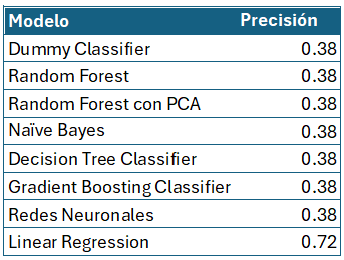



### Avance 5. Ingeniería de características






##Búsqueda de hiperparámetros mejor modelo para el dataframe 1: seguro de autos

Para Decision Tree

In [69]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train1, y_train1)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test1)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test1, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test1, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del mejor modelo: 0.27
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         4
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         1

    accuracy                           0.27        11
   macro avg       0.23      0.35      0.23        11
weighted avg       0.33      0.27      0.26        11



In [70]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [2, 4, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train1, y_train1)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test1)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test1, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test1, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados:
{'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión del mejor modelo: 0.36
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         4
           3       0.25      1.00      0.40         1
           4       0.33      1.00      0.50         1

    accuracy                           0.36        11
   macro avg       0.31      0.60      0.35        11
weighted avg       0.36      0.36      0.31        11



In [71]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [2, 5, 10],
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [2, 5,10]
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=Rf1, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train1, y_train1)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test1)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test1, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test1, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 20}
Precisión del mejor modelo: 0.36
              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.36        11
   macro avg       0.28      0.40      0.32        11
weighted avg       0.32      0.36      0.33        11



##Búsqueda de hiperparámetros mejor modelo para el dataframe 2: seguro de personas

Para Decision Tree

In [72]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=DTC2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train2, y_train2)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test2)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test2, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test2, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión del mejor modelo: 0.64
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.60      0.75      0.67         4
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         2

    accuracy                           0.64        11
   macro avg       0.53      0.60      0.53        11
weighted avg       0.58      0.64      0.58        11



In [73]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [2, 4, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=GBC2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train2, y_train2)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test2)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test2, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test2, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados:
{'criterion': 'friedman_mse', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión del mejor modelo: 0.36
              precision    recall  f1-score   support

           1       0.40      0.67      0.50         3
           2       0.50      0.25      0.33         4
           3       0.25      0.50      0.33         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.29      0.35      0.29        11
weighted avg       0.34      0.36      0.32        11



In [74]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=MLP2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train2, y_train2)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test2)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test2, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test2, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Precisión del mejor modelo: 0.36
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.25      0.25      0.25         4
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         2

    accuracy                           0.36        11
   macro avg       0.27      0.35      0.31        11
weighted avg       0.29      0.36      0.32        11



##Búsqueda de hiperparámetros mejor modelo para el dataframe 3: seguro de empresas

Para Naive Bayes

In [75]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],
    'fit_prior': [True, False],
    'min_categories': [None, 3, 5, 10],
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=nb_model3, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train3, y_train3)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test3)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test3, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test3, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'alpha': 1e-05, 'fit_prior': True, 'min_categories': None}
Precisión del mejor modelo: 0.64
              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.19      0.25      0.22        11
weighted avg       0.49      0.64      0.56        11



In [76]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=DTC3, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train3, y_train3)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test3)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test3, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test3, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
Precisión del mejor modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



In [77]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [2, 5, 10],
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [2, 5,10]
}

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=Rf3, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar la búsqueda de hiperparámetros en los datos de entrenamiento
grid_search.fit(X_train3, y_train3)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener la mejor configuración del modelo
best_clf = grid_search.best_estimator_

# Hacer predicciones con los datos de prueba utilizando el mejor modelo
y_pred = best_clf.predict(X_test3)

# Evaluar el rendimiento del mejor modelo
accuracy = accuracy_score(y_test3, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')

# Mostrar métricas de clasificación detalladas
print(classification_report(y_test3, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 20}
Precisión del mejor modelo: 0.64
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.64        11
   macro avg       0.16      0.25      0.19        11
weighted avg       0.40      0.64      0.49        11



## Stacking

# Seguro Autos

In [87]:


#DTCFinal1 = DecisionTreeClassifier(random_state=42)
#GBCFinal1 = GradientBoostingClassifier(random_state=42)

# Creamos modelo finales de los 3 modelos con los mejores hiperparametros y evaluacion su exactitud y su f1 score
DTCFinal1 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
DTCFinal1.fit(X_train1, y_train1)
y_train_pred = DTCFinal1.predict(X_train1)
DTCFinal1_train_accuracy = accuracy_score(y_train1, y_train_pred)
DTCFinal1_train_f1 = f1_score(y_train1, y_train_pred, average='weighted')


GBCFinal1 = GradientBoostingClassifier(criterion='squared_error',max_depth=4,min_samples_leaf=4,min_samples_split=2,random_state=42)
GBCFinal1.fit(X_train1, y_train1)
y_train_pred = GBCFinal1.predict(X_train1)
GBCFinal1_train_accuracy = accuracy_score(y_train1, y_train_pred)
GBCFinal1_train_f1 = f1_score(y_train1, y_train_pred, average='weighted')


RfFinal1 = RandomForestClassifier(criterion='entropy',max_depth=5,max_leaf_nodes=5,n_estimators=20,random_state=42)
RfFinal1.fit(X_train1, y_train1)
y_train_pred = RfFinal1.predict(X_train1)
RfFinal1_train_accuracy = accuracy_score(y_train1, y_train_pred)
RfFinal1_train_f1 = f1_score(y_train1, y_train_pred, average='weighted')



In [93]:
#Para hacer el Stack hacemos una lista con los modelos
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

estimator_list = [
    ('DTC1',DTCFinal1),
    ('GBC1',GBCFinal1),
    ('RF1',RfFinal1)
     ]
# Usamos el stack clasifier
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Entrenamos el Stack
stack_model.fit(X_train1, y_train1)
y_train_pred = stack_model.predict(X_train1)
y_test_pred = stack_model.predict(X_test1)
#Obtenemos exactitud y F1_score
stack_model_train_accuracy = accuracy_score(y_train1, y_train_pred)
stack_model_train_f1 = f1_score(y_train1, y_train_pred, average='weighted')
stack_model_test_accuracy = accuracy_score(y_test1, y_test_pred)
stack_model_test_f1 = f1_score(y_test1, y_test_pred, average='weighted')


In [91]:
accuracy_train_list = {'DTC1':DTCFinal1_train_accuracy,
'GBC1':GBCFinal1_train_accuracy,
'RF1': RfFinal1_train_accuracy}


f1_train_list = {'DTC1':DTCFinal1_train_f1,
'GBC1': GBCFinal1_train_f1,
'RF1': RfFinal1_train_f1}

In [92]:
acc_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Exactitud'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df,f1_df], axis=1)
df

,Accuracy,F1
DTC1,0.916667,0.911458
GBC1,1.000000,1.000000
RF1,0.958333,0.958625


# Seguro Personas

In [94]:


#DTCFinal1 = DecisionTreeClassifier(random_state=42)
#GBCFinal1 = GradientBoostingClassifier(random_state=42)

# Creamos modelo finales de los 3 modelos con los mejores hiperparametros y evaluacion su exactitud y su f1 score
DTCFinal2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
DTCFinal2.fit(X_train2, y_train2)
y_train_pred = DTCFinal2.predict(X_train2)
DTCFinal2_train_accuracy = accuracy_score(y_train2, y_train_pred)
DTCFinal2_train_f1 = f1_score(y_train2, y_train_pred, average='weighted')


GBCFinal2 = GradientBoostingClassifier(criterion='friedman_mse',max_depth=2,min_samples_leaf=4,min_samples_split=2,random_state=42)
GBCFinal2.fit(X_train2, y_train2)
y_train_pred = GBCFinal2.predict(X_train2)
GBCFinal2_train_accuracy = accuracy_score(y_train2, y_train_pred)
GBCFinal2_train_f1 = f1_score(y_train2, y_train_pred, average='weighted')

MLPFinal2 = MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam', random_state=42)
MLPFinal2.fit(X_train2, y_train2)
y_train_pred = MLPFinal2.predict(X_train2)
MLPFinal2_train_accuracy = accuracy_score(y_train2, y_train_pred)
MLPFinal2_train_f1 = f1_score(y_train2, y_train_pred, average='weighted')



In [95]:
#Para hacer el Stack hacemos una lista con los modelos
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

estimator_list = [
    ('DTC2',DTCFinal2),
    ('GBC2',GBCFinal2),
    ('MLP2',MLPFinal2)
     ]
# Usamos el stack clasifier
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Entrenamos el Stack
stack_model.fit(X_train2, y_train2)
y_train_pred = stack_model.predict(X_train2)
y_test_pred = stack_model.predict(X_test2)
#Obtenemos exactitud y F1_score
stack_model_train_accuracy = accuracy_score(y_train2, y_train_pred)
stack_model_train_f1 = f1_score(y_train2, y_train_pred, average='weighted')
stack_model_test_accuracy = accuracy_score(y_test2, y_test_pred)
stack_model_test_f1 = f1_score(y_test2, y_test_pred, average='weighted')


In [96]:
accuracy_train_list = {'DTC2':DTCFinal2_train_accuracy,
'GBC2':GBCFinal2_train_accuracy,
'MLP2': MLPFinal2_train_accuracy}


f1_train_list = {'DTC2':DTCFinal2_train_f1,
'GBC2': GBCFinal2_train_f1,
'MLP2': MLPFinal2_train_f1}

In [97]:
acc_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Exactitud'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df,f1_df], axis=1)
df

,Exactitud,F1
DTC2,0.958333,0.939103
GBC2,1.000000,1.000000
MLP2,1.000000,1.000000


# Seguro Empresas

In [109]:


#DTCFinal1 = DecisionTreeClassifier(random_state=42)
#GBCFinal1 = GradientBoostingClassifier(random_state=42)

# Creamos modelo finales de los 3 modelos con los mejores hiperparametros y evaluacion su exactitud y su f1 score
#NBFinal3 = CategoricalNB(alpha=1e-05,fit_prior=True,min_categories=None)
NBFinal3 = CategoricalNB()
NBFinal3.fit(X_train3, y_train3)
y_train_pred = NBFinal3.predict(X_train3)
NBFinal3_train_accuracy = accuracy_score(y_train3, y_train_pred)
NBFinal3_train_f1 = f1_score(y_train3, y_train_pred, average='weighted')


DTCFinal3 = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=10,min_samples_leaf=4,random_state=42)
DTCFinal3.fit(X_train3, y_train3)
y_train_pred = DTCFinal3.predict(X_train3)
DTCFinal3_train_accuracy = accuracy_score(y_train3, y_train_pred)
DTCFinal3_train_f1 = f1_score(y_train3, y_train_pred, average='weighted')


RFFinal3 = RandomForestClassifier(criterion='entropy',max_depth=5,max_leaf_nodes=5,n_estimators=20,random_state=42)
RFFinal3.fit(X_train3, y_train3)
y_train_pred = RFFinal3.predict(X_train3)
RFFinal3_train_accuracy = accuracy_score(y_train3, y_train_pred)
RFFinal3_train_f1 = f1_score(y_train3, y_train_pred, average='weighted')



In [116]:
#Para hacer el Stack hacemos una lista con los modelos
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

estimator_list = [
    ('DTC3',DTCFinal3),
    ('RF3',RFFinal3),
     ]

# NB no se peude correr
# Usamos el stack clasifier
stack_model = StackingClassifier(
    estimators=estimator_list
)

# Entrenamos el Stack
stack_model.fit(X_train3, y_train3)
y_train_pred = stack_model.predict(X_train3)
y_test_pred = stack_model.predict(X_test3)
#Obtenemos exactitud y F1_score
stack_model_train_accuracy = accuracy_score(y_train3, y_train_pred)
stack_model_train_f1 = f1_score(y_train3, y_train_pred, average='weighted')
stack_model_test_accuracy = accuracy_score(y_test3, y_test_pred)
stack_model_test_f1 = f1_score(y_test3, y_test_pred, average='weighted')


In [106]:
accuracy_train_list = {
'DTC3':DTCFinal3_train_accuracy,
'RF3': RFFinal3_train_accuracy}


f1_train_list = {
'DTC3': DTCFinal3_train_f1,
'RF3': RFFinal3_train_f1}

In [107]:
acc_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Exactitud'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df,f1_df], axis=1)
df

,Exactitud,F1
DTC3,0.625000,0.510101
RF3,0.833333,0.823413


### Conclusiones

Teniendo en cuenta los resultados para el Estudio de

**Para el ramo de autos**

Concluimos que con los datos obtenidos no hay un modelo lo suficiente exacto para hacer una prediccion cercana, esto pudiera considerarse normal ya que la mayoria de los agentes manejan este rubro, y es lo mas simple de vender. No se requeire de mucha capacitacion y la mayoria de la poblacion es el seguro que adquiere, es por eso que consideramos que con la informacion con la que se cuenta no es posible generar una predicción en este ramo con ningun modelo, teniendo el decisionTree y el RandomForest exactidues de solo un 36%. Dentro de las variable que mas nos sorprendieron en este ramo es la variable de que si pertenecen a un club social. y tiene algo de logica, ya que al ser el seguro de mayor facilidad de venta, una persona con el alcance social mayor llega a vender mas este producto.

**Para el ramo de personas**

El DEcision Tree aunque no tiene la exactitud que se busca en un modelo predictivo normal, dadas las circunstancias de la muestra pequeña por los tiempos de la encuesta podemos determianr que este modelo ofrece el doble de exactitud que los demas estudiados, en este modelo llegamos a tener un 64% vs 36% de los demas modelos estudiados. Aqui cabe señalar que se encontraron cosas que empiricamente creiamos que eran factores a estudiar dentro del estudio. Variables como la cedula de agente, en este ramo que lleva mayor especializacion es una variable que pesa, al igual que el tener una oficina o personal de apoyo

**Para el ramo empresarial**

Los 3 modelos se comportan de  manera similar en cuanto a sus resultados, aunque como lo comentamos en el putno anterio la falta de registros para tener mejores modelso dan resultados pobres, estamos hablando que los 3 modelos manejan exactitudes de 63%, en este casi y viendo que el DecisionTree del modelo de personas es que mejor se comporto, creemos que este modelo seria tambien el mas adecuado para usarse. Aqui cabe señalar que la rama es muy especializada y la variable de que si el agente inicio por un curos dentro de una compañia de seguros se torna una variable de peso.

